# Tarea 6: Integración con Taylor

Fecha de envío del PR inicial: **viernes 5 de mayo**

Fecha de aceptación del PR: **martes 16 de mayo, antes de la clase**

---

## Ejercicio 1

Usando su implementación de polinomios de Taylor, escriban un integrador para la ecuación diferencial que se desarrolló en este ejemplo, esto es, $\dot{x} = x^2$ con la condición inicial $x(0) = 3$. 

El integrador debe hacer las operaciones necesarias para obtener automáticamente los coeficientes $x_{[k]}$, *en cada paso de integración*, a partir de la condición inicial local. Un requisito básico para esto es que tengan una implementación de la función $P_\alpha(x) = [g(x)]^\alpha$ con $g(x)$ un polinomio de Taylor, que hicieron en la "Tarea5", y que funcione bien en particular para `alpha::Int`.

La implementación debe consistir de varias funciones: 

- Una función donde se calculen los coeficientes $x_{[k]}$ de la expansión. Esta función deberá llamar a otra donde se implementan las recurrencias que imponen las ecuaciones de movimiento.

- Una función donde se obtenga el paso de integración $h$ como se describió en el notebook 10.

- Otra función donde se haga la suma usando el método de Horner.

- Finalmente, una función que combine las funciones anteriores para hacer la integración desde un tiempo inicial a uno final. En este punto, *fingiremos ignorancia*, en el sentido de  que el tiempo inicial es cero, y el tiempo final será $0.5$ (que está más allá de donde la solución está definida).


Dado que conocemos la solución analítica de este problema, grafiquen como función de $t$ el error relativo de su integrador (respecto al valor del resultado analítico).

In [1]:
using PyPlot

In [2]:
include("TaylorDiff.jl")
using ATaylor

In [3]:
"""
coefTaylor(x0,N)

Función que regresa un arreglo Taylor para la función \$f(x)\$, donde x0 es la condición inicial \$x(0)=3\$ y \$N\$ es
 el grado del polinomio de Taylor.
"""
function coefTaylor(f,x0,N)
    x=taylor([x0],N)
    for n in 1:N
        a=f(x)
        x.v[n+1]=a.v[n]/n
    end
    return Taylor(x.v)
end
"""
pasointh(x0,N,ϵ)

Función que regresa el paso de integración \$h\$ para un polinomio de Taylor, donde x es el arreglo 
tipo Taylor y \$\epsilon\$ una cota mínima que asignamos.
"""
function pasointh(x,ϵ)
    h=(ϵ/abs(x.v[end]))^(1/(length(x.v)-1))
    l=(ϵ/abs(x.v[end-1]))^(1/(length(x.v)-2))
    return min(h,l)
end
"""
Horner(h,x,P)

Función que regresa \$x_1\$ después de evaluar \$h\$ en el polinomio de Taylor. Implementa el método de Horner. 
\$h\$(paso de integración), \$x\$(arreglo de Taylor), \$P\$(grado máximo del polinomio) 
"""
function Horner(h,x,P)
    r = x.v[P]
    for i in P:-1:2
        r = x.v[i-1] + h*r
    end
    return r
end
"""
solecuacion(f,x0,ϵ,N,tf)

Solución de la ecuación diferencial. 
"""
function solecuacion(f,x0,ϵ,N,tf)
    M=2000
    a=zeros(eltype(x0), M)
    s=zeros(eltype(x0), M)
    z=zeros(eltype(x0), M)
    s[1]=x0
    a[1]=x0
    i=2
    while i<=M && z[i-1]<=tf
        x=coefTaylor(f,x0,N)
        h=pasointh(x,ϵ)
        x0=Horner(h,x,N)
        s[i]=x0
        z[i]=z[i-1]+h
        a[i]=3.0/(1-3*(z[i]))
        i+=1
    end
    return z,s,a
end

solecuacion

In [4]:
f(x)=x^2#función de la ecuación diferencial dx(t)/dt=x^2
x0=3.0
ϵ=1e-20
N=17
tf=0.5
z,s,a=solecuacion(f,x0,ϵ,N,tf)

([0.0,0.0175008,0.034027,0.049636,0.0643814,0.0783139,0.0914809,0.103927,0.115693,0.126819  …  0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333],[3.0,3.16624,3.34106,3.52488,3.71814,3.92127,4.13475,4.35907,4.59474,4.84229  …  3.61429e14,3.63948e14,3.66483e14,3.69034e14,3.71603e14,3.74188e14,3.76789e14,3.79408e14,3.82044e14,3.84697e14],[3.0,3.16624,3.34106,3.52488,3.71814,3.92127,4.13475,4.35907,4.59474,4.84229  …  3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14])

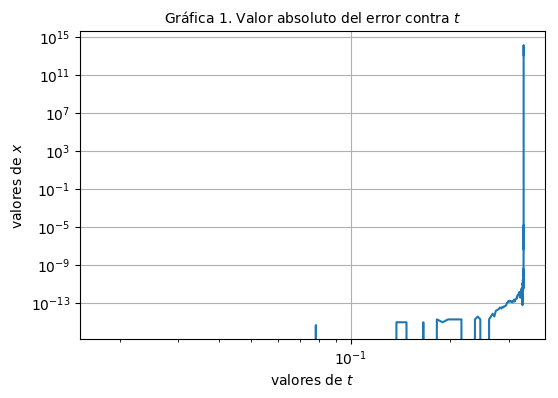

In [5]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(z,abs(a-s))    # este comando pinta el tiempo(z) contra el error abs(a-s)
#plot(z,log10(abs(a-s)))
title(L"Gráfica 1. Valor absoluto del error contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
xscale("log")
yscale("log")
grid() 

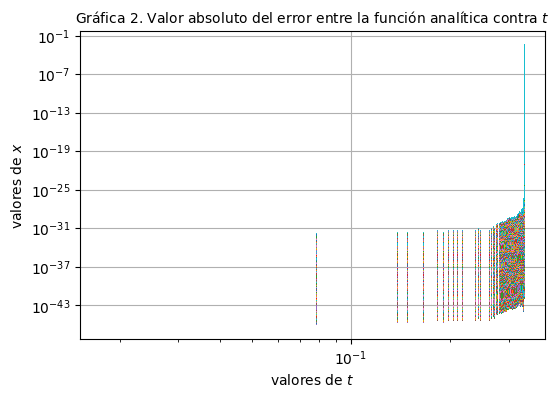

In [6]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(z,abs(a-s)/a, ",")# este comando pinta el tiempo(z) contra el error abs(a-s)/a
title(L"Gráfica 2. Valor absoluto del error entre la función analítica contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
xscale("log")
yscale("log")
grid() 

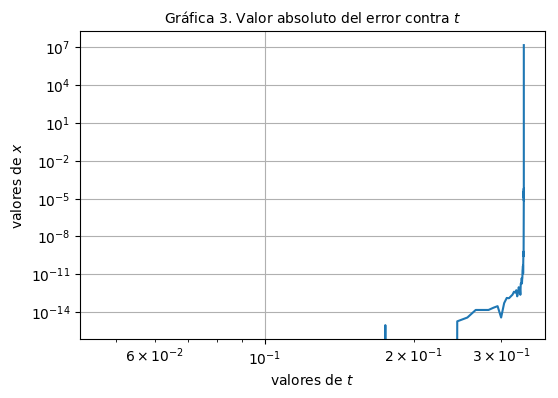

In [7]:
#Aumento el orden del polinomio y el error disminuye
N=25
z,s,a=solecuacion(f,x0,ϵ,N,tf)

figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(z,abs(a-s))    # este comando pinta la función f'(x);
title(L"Gráfica 3. Valor absoluto del error contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
xscale("log")
yscale("log")
grid() 

## Ejercicio 2

Repitan la integración del ejercicio anterior usando el método de Runge-Kutta de 4o orden con paso de integración fijo (que es lo más sofisticado que conocen hasta ahora) y comparen los resultados del error relativo con los obtenidos con el método de Taylor. En particular, finjan ignorancia de la misma manera que en el ejercicio anterior.

**El método de Runge-Kutta**

Para el problema de valores iniciales
$$y'=f(x,y)$$
$$y(x_0)=y_0$$
La fórmula de Runge-Kutta involucra un promedio pesado de los valores de $f(x,y)$ tomado en puntos diferentes en el intervalo $x_n\leq x\leq x_{n+1}$. Está dada por
\begin{equation}
y_{n+1}=y_n+\frac{h}{6}\left[k_{n1}+2k_{n2}+2k_{n3}+k_{n4}\right]
\end{equation}
donde
$$\begin{array}{lll}
    k_{n1}& = &f(x_{n},y_{n})\\
    k_{n2}& = &f(x_{n}+\frac{1}{2}h,y_{n}+\frac{1}{2}hk_{n1})\\
    k_{n3}& = &f(x_{n}+\frac{1}{2}h,y_{n}+\frac{1}{2}hk_{n2})\\
    k_{n4}& = &f(x_{n}+h,y_{n}+hk_{n3})\\
  \end{array}$$
ver(Introducción a las Ecuaciones Diferenciales, E. Boyce y C. DiPrima).

Si $\dot{x}=f(t,x)=x^2$ con la condición inicial $x(t_0=0)=x_0 = 3$ entonces para $n=0$
$$\begin{array}{lll}
    k_{01}& = &f(t_{0},x_{0})=3^2\\
    k_{02}& = &f(t_{0}+\frac{1}{2}h,x_{0}+\frac{1}{2}hk_{01})=f(\frac{1}{2}h,3+\frac{1}{2}h3^2)
    =\left[3+\frac{1}{2}h3^2\right]^2\\
    k_{03}& = &f(t_{0}+\frac{1}{2}h,x_{0}+\frac{1}{2}hk_{02})=\left[3+\frac{1}{2}h\left(3+\frac{1}{2}h3^2\right)^2\right]^2\\
    k_{04}& = &f(t_{0}+h,x_{0}+hk_{03})=\left\{3+h\left[3+\frac{1}{2}h\left(3+\frac{1}{2}h3^2\right)^2\right]^2\right\}^2\\
  \end{array}$$
  
  \begin{equation}
x_{1}=x_0+\frac{h}{6}\left[k_{01}+2k_{02}+2k_{03}+k_{04}\right]
\end{equation}

In [8]:
"""
    metRungeKutta(f,t0,tf,x0,h)

Esta función resuelve la ecuación diferencial \$y'=f(t,x)\$ con condición inicial \$x(t_0)=x_0\$. Los valores de 
entrada son \$f=f(t,x)\$, \$t0,tf,x0\$(condiciones iniciales), \$h\$(tamaño del intervalo 
\$[t_n,t_{n+1}]\$).
"""
function metRungeKutta(f,t0,tf,x0,h)
    N=Int((tf-t0)/h)
    x=zeros(eltype(h),N)
    t=zeros(eltype(h),N)
    t[1]=t0 
    x[1]=x0
    return kasRK4(f,t,x)
end
function kasRK4(f,t,x)#función de apoyo para el método de Runge Kutta
    for i in 1:length(x)-1
        kn1=f(t[i],x[i])
        kn2=f(t[i]+(1/2)*h,x[i]+(1/2)*h*kn1)
        kn3=f(t[i]+(1/2)*h,x[i]+(1/2)*h*kn2)
        kn4=f(t[i]+h,x[i]+h*kn3)
        x[i+1]=x[i]+(h/6)*(kn1 +2kn2+2kn3+kn4)
        t[i+1]=i*h
    end
    return t,x
end
"""
    funcion(g,N,h)

Esta función regresa los vectores \$x\$ y \$y=g(x)\$ para \$N\$ puntos separados una distancia \$h\$.
"""
function funcion(g,t0,tf,h)
    N=Int((tf-t0)/h)
    x=zeros(eltype(h),N)
    y=zeros(eltype(h),N)
    for i in 1:N
        x[i]=(i-1)*h
        y[i]=g(x[i])
    end
    return x,y
end

funcion

In [9]:
?metRungeKutta

search:



```
metRungeKutta(f,t0,tf,x0,h)
```

Esta función resuelve la ecuación diferencial $y'=f(t,x)$ con condición inicial $x(t_0)=x_0$. Los valores de  entrada son $f=f(t,x)$, $t0,tf,x0$(condiciones iniciales), $h$(tamaño del intervalo  $[t_n,t_{n+1}]$).


In [10]:
f(t,x)=x^2  #ecuación diferencial
g(t)=3/(1-3t) #solución analítica a la ecuación diferencial
h=0.01  
t0=0.0 #tiempo inicial
tf=0.5 #tiempo final
x0=3.0 #valor de x0=3.0
(t,x)=metRungeKutta(f,t0,tf,x0,h)
(a,b)=funcion(g,t0,tf,h)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49],[3.0,3.09278,3.19149,3.2967,3.40909,3.52941,3.65854,3.79747,3.94737,4.10959  …  -15.0,-13.0435,-11.5385,-10.3448,-9.375,-8.57143,-7.89474,-7.31707,-6.81818,-6.38298])

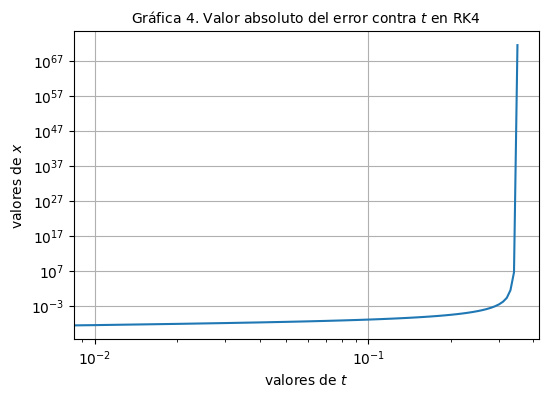

In [11]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,abs(b-x))    # este comando pinta el valor absoluto de función analítica(b)-función numérica contra t
title(L"Gráfica 4. Valor absoluto del error contra $t$ en RK4", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
xscale("log")
yscale("log")
grid() 

In [12]:
#cambio el tamaño del paso h a h=0.001
h=0.001
(t,x)=metRungeKutta(f,t0,tf,x0,h)
(a,b)=funcion(g,t0,tf,h)

([0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009  …  0.49,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499],[3.0,3.00903,3.01811,3.02725,3.03644,3.04569,3.05499,3.06435,3.07377,3.08325  …  -6.38298,-6.34249,-6.30252,-6.26305,-6.22407,-6.18557,-6.14754,-6.10998,-6.07287,-6.03622])

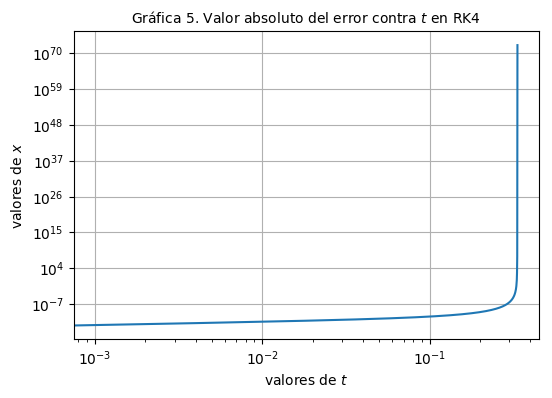

In [13]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,abs(b-x))    # este comando pinta el valor absoluto de función analítica(b)-función numérica contra t
title(L"Gráfica 5. Valor absoluto del error contra $t$ en RK4", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
xscale("log")
yscale("log")
grid() 

*Con el método de Taylor en las gráficas 1 y 3 se muestra un error relativo del orden de $10^{15}$ para un polinomio de grado 17, $10^7$ para un polinomio de grado 25, esto en escala logarítmica. Por otra parte en el método de Runge Kutta para un valor $h=0.01$ el error llega a $10^{77}$, si $h=0.001$ el error llega a $10^{73}$. El método de Taylor es por mucho más eficiente.*

---

## Ejercicio 3

Integra la ecuación de movimiento para el oscilador armónico, $\ddot{x} = -2x$, con $x(0)=2$, $\dot{x}(0)=0$, durante 10^4 periodos de oscilación (o sea, hasta $t_f = 10^4 \cdot 2\pi/\sqrt{2}$, usando el método de Taylor y el método de Runge-Kutta de 4o orden con paso de integración constante. Compara cómo cambia la energía (respecto al valor al tiempo cero) en función del tiempo en ambos métodos.

**Solución analítica**

Sea $x(t)=Ae^{\alpha t}$ entonces
$$\ddot{x}+2x=0\hspace{.5cm}\Rightarrow \alpha^2Ae^{\alpha t}+2Ae^{\alpha t}=0\Rightarrow \alpha^2+2=0\Rightarrow \alpha=\pm i\sqrt{2}$$ por lo que

$$\displaystyle{x(t)=Ae^{it\sqrt{2}}+Be^{-it\sqrt{2}} }$$
$$\displaystyle{\dot{x}(t)=i\sqrt{2}Ae^{it\sqrt{2}}-i\sqrt{2}Be^{-it\sqrt{2}} }$$

por las condiciones iniciales
$$x(0)=A+B=2$$
$$\dot{x}(0)=i\sqrt{2}A-i\sqrt{2}B=0$$

$$B=A$$
$$A=1$$

entonces
$$\displaystyle{x(t)=e^{it\sqrt{2}}+e^{-it\sqrt{2}}=2\cos\left(t\sqrt{2}\right) }$$
$$\displaystyle{\dot{x}(t)=-2\sqrt{2}\sin\left(t\sqrt{2}\right) }$$

Para el oscilador armónico donde $F(x)=-kx$, $V(x)=-\int F(x)dx$, $E=T+V$, donde $T$ es la energía cinética y $V$ la potencial.

$$E=\frac{1}{2}m\dot{x}^2+\frac{1}{2}kx^2$$

Del problema observo $k/m=2$ entonces
$$\frac{E}{m}=\frac{1}{2}\dot{x}^2+\frac{k}{2m}x^2=\frac{1}{2}\dot{x}^2+x^2=\hat{E}=\mbox{cte}$$

In [14]:
"""
    metRungeKutta2(f1,f2,x0,y0,z0,N,h)

Esta función resuelve la ecuación diferencial \$y=f(x,y,z)=\dot{x}\$ con condición inicial \$x(t_0)=x_0\$,
\$-2x=g(x,y,z)=\ddot{x}\$ con condición inicial \$\dot{x}(t_0)=y_0\$. Los valores de 
entrada son \$f=f(t,x,y)\;,g=g(t,x,y)\$, \$t0,tf,x0,y0\$(condiciones iniciales), 
\$h\$(tamaño del intervalo \$[t_n,t_{n+1}]\$).
"""
function metRungeKutta2(f,g,t0,tf,x0,y0,h)
    N=Int((tf-t0)/h)
    t=zeros(eltype(h),N)
    x=zeros(eltype(h),N)
    y=zeros(eltype(h),N)
    t[1]=t0 
    x[1]=x0
    y[1]=y0
    return kasRK42(f,g,t,x,y)
end
function kasRK42(f,g,t,x,y)#función de apoyo para el método de Runge Kutta
    for i in 1:length(x)-1
        kn11=f(t[i],x[i],y[i])#kn1 para f
        kn12=g(t[i],x[i],y[i])#kn1 para g
        
        kn21=f(t[i]+(1/2)*h,x[i]+(1/2)*h*kn11,y[i]+(1/2)*h*kn12)#kn1 para f
        kn22=g(t[i]+(1/2)*h,x[i]+(1/2)*h*kn11,y[i]+(1/2)*h*kn12)#kn1 para g
        
        kn31=f(t[i]+(1/2)*h,x[i]+(1/2)*h*kn21,y[i]+(1/2)*h*kn22)#kn1 para f
        kn32=g(t[i]+(1/2)*h,x[i]+(1/2)*h*kn21,y[i]+(1/2)*h*kn22)#kn1 para g
        
        kn41=f(t[i]+h,x[i]+h*kn31,y[i]+h*kn32)#kn1 para f
        kn42=g(t[i]+h,x[i]+h*kn31,y[i]+h*kn32)#kn1 para g
        
        x[i+1]=x[i]+(h/6)*(kn11 +2kn21+2kn31+kn41)
        y[i+1]=y[i]+(h/6)*(kn12 +2kn22+2kn32+kn42)
        t[i+1]=i*h
    end
    return t,x,y
end
function energia(x,y)
    E=zeros(eltype(x),length(x))
    for i in 1:length(x)
        E[i]=(1/2)*y[i]^2+x[i]^2
    end
    return E
end 

energia (generic function with 1 method)

In [15]:
tfinal=10^4*2*π/sqrt(2)#tiempo total de las oscilaciones

44428.82938158366

In [16]:
f(t,x,y)=y #primera derivada de x
g(t,x,y)=-2x #segunda derivada de x
t0=0.0
x0=2.0
y0=0.0
h=0.1
tf=44429#tiempo total de las oscilaciones
t,x,y=metRungeKutta2(f,g,t0,tf,x0,y0,h)
fun(t)=2.0*cos(sqrt(2)*t) #función analítica
E=energia(x,y)
(a,b)=funcion(fun,t0,tf,h)

([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9  …  44428.0,44428.1,44428.2,44428.3,44428.4,44428.5,44428.6,44428.7,44428.8,44428.9],[2.0,1.98003,1.92053,1.82268,1.68844,1.52049,1.32218,1.09746,0.850839,0.587226  …  0.774918,1.02706,1.2587,1.46521,1.64246,1.78691,1.89569,1.96661,1.99827,1.99003])

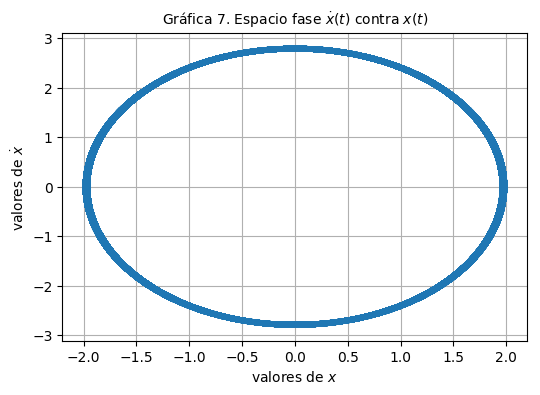

In [17]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,y)    # este comando pinta la función f'(x); 
title(L"Gráfica 7. Espacio fase $\dot{x}(t)$ contra $x(t)$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $\dot{x}$")
grid() 

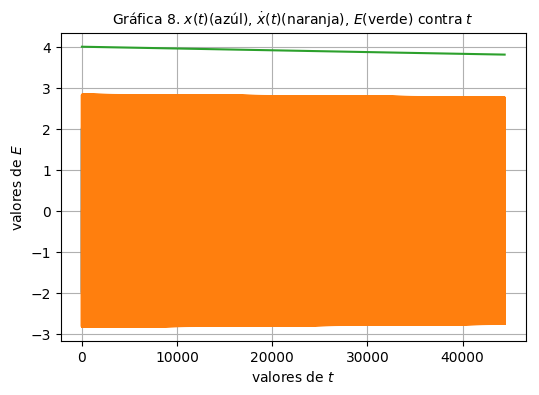

In [18]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,x)    # este comando pinta la función f'(x); 
plot(t,y)
plot(t,E)
title(L"Gráfica 8. $x(t)$(azúl), $\dot{x}(t)$(naranja), $E$(verde) contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $E$")
#xscale("log")
#yscale("log")
grid()

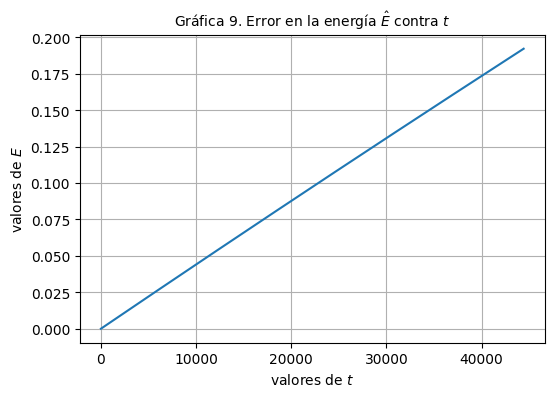

In [19]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,4-E)
title(L"Gráfica 9. Error en la energía $\hat{E}$ contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $E$")
grid()

**Para apreciar de mejor manera la gráfica 8 cambio el tiempo**

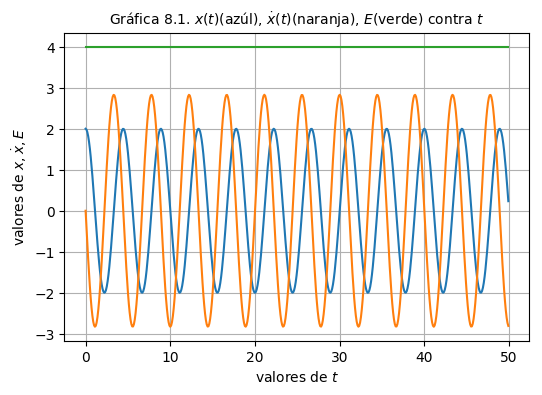

In [20]:
tf=50#tiempo total de las oscilaciones
t,x,y=metRungeKutta2(f,g,t0,tf,x0,y0,h)
E=energia(x,y)
(a,b)=funcion(fun,t0,tf,h)
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,x)    # este comando pinta la función f'(x); 
plot(t,y)
plot(t,E)
title(L"Gráfica 8.1. $x(t)$(azúl), $\dot{x}(t)$(naranja), $E$(verde) contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x,\dot{x},E$")
#xscale("log")
#yscale("log")
grid()

**Con el método de Taylor**

In [21]:
#método con dos ecuaciones para las funciones del ejercicio 1, con codicion inicial x0 para f y y0 para g
function coefTaylor(f,g,x0,y0,N)
    x=taylor([x0],N)
    y=taylor([y0],N)
    for n in 1:N
        q=f(x,y)
        w=g(x,y)
        a=taylor(q.v,n+1)
        b=taylor(w.v,n+1)
        x.v[n+1]=a.v[n]/n
        y.v[n+1]=b.v[n]/n
    end
    return Taylor(x.v),Taylor(y.v)
end
function pasointh(x,y,ϵ)
    fh=(ϵ/abs(x.v[end]))^(1/(length(x.v)-1))
    fl=(ϵ/abs(x.v[end-2]))^(1/(length(x.v)-3))
    gh=(ϵ/abs(y.v[end]))^(1/(length(y.v)-1))
    gl=(ϵ/abs(y.v[end-2]))^(1/(length(y.v)-3))
    return min(fh,fl,gh,gl)
end
function solecuacion(f,g,x0,y0,ϵ,N,tf)
    M=300000 #número máximo de elementos para los vectores
    a=zeros(eltype(x0), M)
    da=zeros(eltype(x0), M)
    s1=zeros(eltype(x0), M)
    s2=zeros(eltype(x0), M)
    t=zeros(eltype(x0), M)
    s1[1]=x0
    a[1]=x0
    s2[1]=y0
    da[1]=y0
    i=2
    while i<=M && t[i-1]<=tf
        x,y=coefTaylor(f,g,x0,y0,N)
        h=pasointh(x,y,ϵ)
        x0=Horner(h,x,x.n+1)
        y0=Horner(h,y,y.n+1)
        s1[i]=x0
        s2[i]=y0
        t[i]=t[i-1]+h
        a[i]=(2.0)*cos(t[i]*sqrt(2))
        da[i]=-(2.0)*sqrt(2)*sin(t[i]*sqrt(2))
        i+=1
    end
    t=Taylor(t);s1=Taylor(s1);s2=Taylor(s2);a=Taylor(a);da=Taylor(da)
    return t.v,s1.v,s2.v,a.v,da.v
end

solecuacion (generic function with 2 methods)

In [22]:
f(x,y)=y #primera derivada de x
g(x,y)=-(2.0)*x #segunda derivada de x
x0=2.0
y0=0.0
N=25
ϵ=1e-34
tf=44429
t,s1,s2,a,da=solecuacion(f,g,x0,y0,ϵ,N,tf)
E=energia(s1,s2)

207319-element Array{Float64,1}:
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 ⋮  
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0

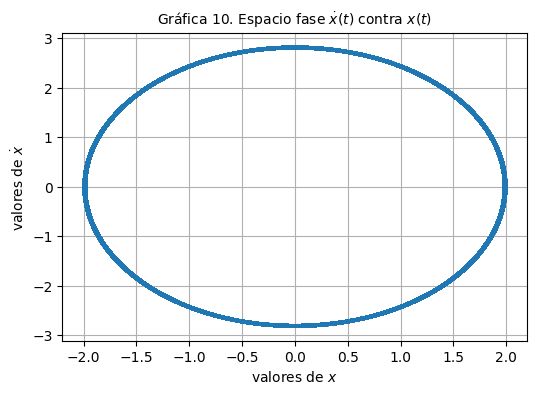

In [23]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(s1,s2)    # este comando pinta la función f'(x); 
title(L"Gráfica 10. Espacio fase $\dot{x}(t)$ contra $x(t)$", fontsize=10)
xlabel(L"valores de $x$")
ylabel(L"valores de $\dot{x}$")
grid() 

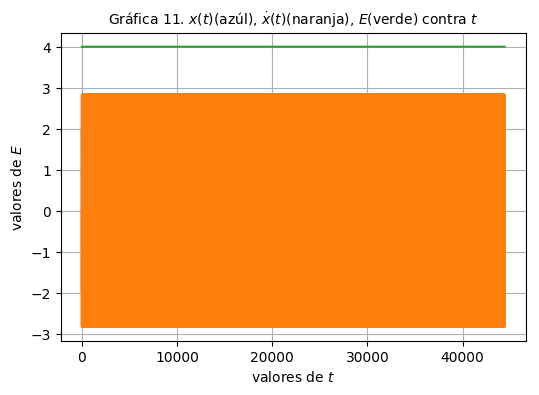

In [24]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,s1)    # este comando pinta el tiempo contra la solución númerica x(t)
plot(t,s2)    # este comando pinta el tiempo contra la solución númerica derivada(x(t))
plot(t,E)     # este comando pinta el tiempo contra la solución númerica E
title(L"Gráfica 11. $x(t)$(azúl), $\dot{x}(t)$(naranja), $E$(verde) contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $E$")
#xscale("log")
#yscale("log")
grid()

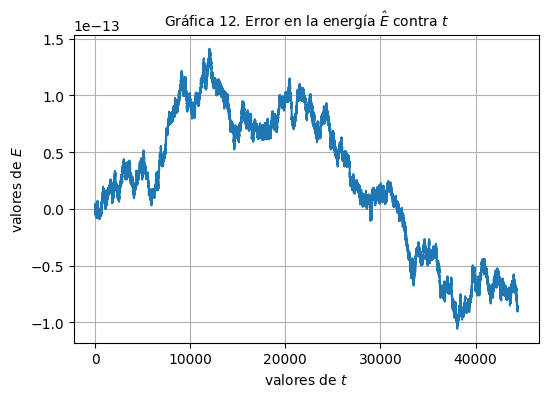

In [25]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,4-E)# este comando pinta el tiempo contra (E-analítica-E-númerica)
title(L"Gráfica 12. Error en la energía $\hat{E}$ contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $E$")
grid()

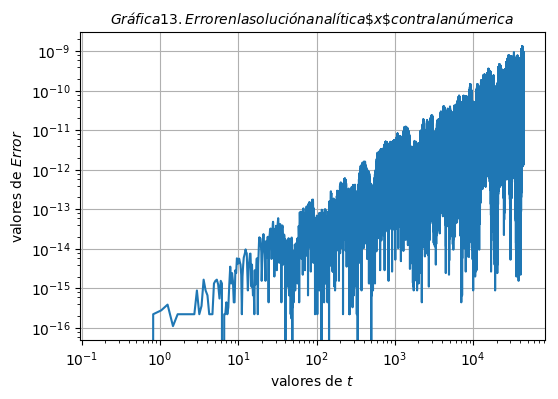

In [26]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,abs(a-s1))
title(L"Gráfica 13. Error en la solución analítica \$x\$ contra la númerica", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $Error$")
xscale("log")
yscale("log")
grid()

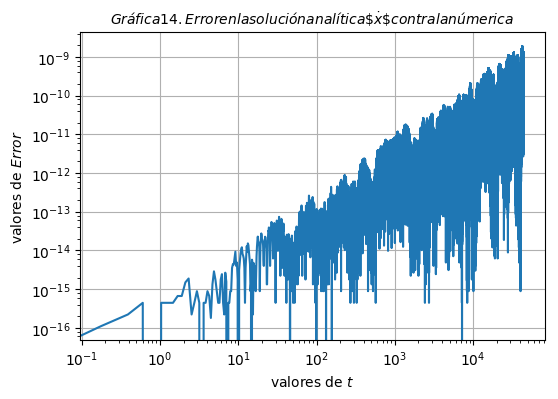

In [27]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,abs(da-s2))
title(L"Gráfica 14. Error en la solución analítica \$\dot{x}\$ contra la númerica", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $Error$")
xscale("log")
yscale("log")
grid()

**Para apreciar de mejor manera la gráfica 11 cambio el tiempo**

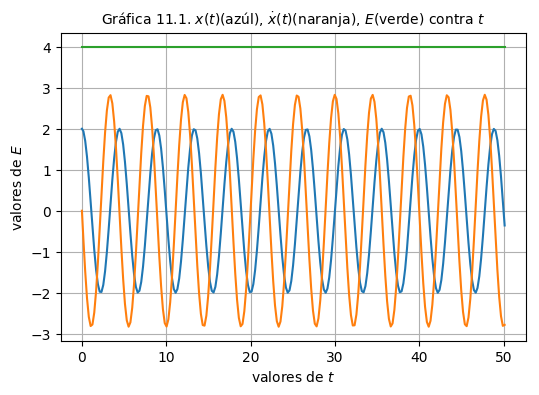

In [28]:
tf=50#tiempo total de las oscilaciones
t,s1,s2,a,da=solecuacion(f,g,x0,y0,ϵ,N,tf)
E=energia(s1,s2)
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,s1)    # este comando pinta el tiempo contra la solución númerica x(t)
plot(t,s2)    # este comando pinta el tiempo contra la solución númerica derivada(x(t))
plot(t,E)     # este comando pinta el tiempo contra la solución númerica E
title(L"Gráfica 11.1. $x(t)$(azúl), $\dot{x}(t)$(naranja), $E$(verde) contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $E$")
#xscale("log")
#yscale("log")
grid()

Con el método de Runge Kutta la energía disminuye conforme avanza el tiempo(ver gráfica 8 y 9), es decir, no se conserva. Con el método de Taylor la energía se mantiene con un error de $1.4e^{-13}$(ver gráficas 10-14). El método de Taylor es más exacto que el de Runge Kutta.